In [12]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# parameter
n_samples = 100
n_features = 2
noise = 2


dataset  = make_regression(n_samples,n_features,noise=noise)

In [3]:
dataset = pd.DataFrame(dataset[0],columns=['X','Y'])

In [4]:
# Synthetic dataset
dataset

,X,Y
0,-0.625632,-1.181156
1,0.096394,0.772886
2,1.261168,-0.794820
3,-0.530987,-1.036637
4,-1.110989,1.264025
...,...,...
95,-0.368778,1.064664
96,0.613857,-0.647658
97,-0.308181,-0.118153
98,0.138667,-0.855029


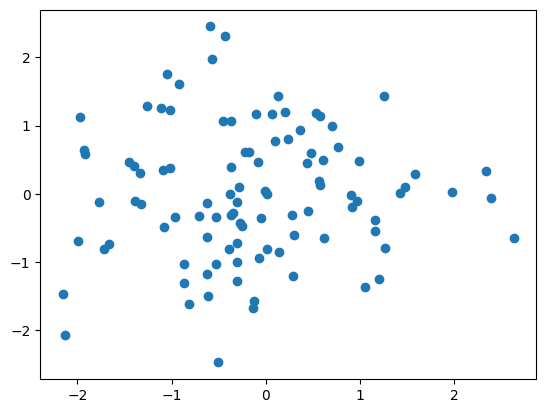

In [5]:
plt.scatter(dataset['X'],dataset['Y'])

Y = m*X+b

X is the independent variable
Y is the dependent variable on X



In [10]:
mean_x = dataset['X'].mean()

mean_y = dataset['Y'].mean()

In [11]:
mean_y

-0.0012642118864816866

In [20]:
x = np.array([i+2 for i in range(5)])
y = np.array([i*2 for i in range(1,6)])

In [41]:
table = pd.DataFrame(list(zip(x,y)),columns=['X','Y'])

In [43]:
table

,X,Y
0,2,2
1,3,4
2,4,6
3,5,8
4,6,10


In [51]:
x_mean = table['X'].mean()
y_mean = table['Y'].mean()
x_mean

4.0

In [48]:
y_mean

6.0

In [53]:
table['Deviation_X'] = table.apply(lambda x: x['X']-x_mean,axis=1)

In [54]:
table['Deviation_Y'] = table.apply(lambda x: x['Y']-y_mean,axis=1)
table

,X,Y,Deviation_X,Deviation_Y
0,2,2,-2.0,-4.0
1,3,4,-1.0,-2.0
2,4,6,0.0,0.0
3,5,8,1.0,2.0
4,6,10,2.0,4.0


In [55]:
table['Deviation_product'] = table.apply(lambda x: x['Deviation_X']*x['Deviation_Y'],axis=1)

In [56]:
table

,X,Y,Deviation_X,Deviation_Y,Deviation_product
0,2,2,-2.0,-4.0,8.0
1,3,4,-1.0,-2.0,2.0
2,4,6,0.0,0.0,0.0
3,5,8,1.0,2.0,2.0
4,6,10,2.0,4.0,8.0


In [58]:
sum_of_product_of_deviation = table['Deviation_product'].sum()

In [59]:
sum_of_product_of_deviation

20.0

In [60]:
table['square_of_deviation_x'] = table.apply(lambda x: x['Deviation_X']**2,axis=1)

In [61]:
table

,X,Y,Deviation_X,Deviation_Y,Deviation_product,square_of_deviation_x
0,2,2,-2.0,-4.0,8.0,4.0
1,3,4,-1.0,-2.0,2.0,1.0
2,4,6,0.0,0.0,0.0,0.0
3,5,8,1.0,2.0,2.0,1.0
4,6,10,2.0,4.0,8.0,4.0


In [63]:
sum_of_square_of_deviation_x = table['square_of_deviation_x'].sum()
sum_of_square_of_deviation_x

10.0

In [64]:
slope = sum_of_product_of_deviation/sum_of_square_of_deviation_x

In [65]:
slope

2.0

In [66]:
Bias = y_mean- (slope*x_mean)

In [67]:
Bias

-2.0

In [68]:
x_mean

4.0

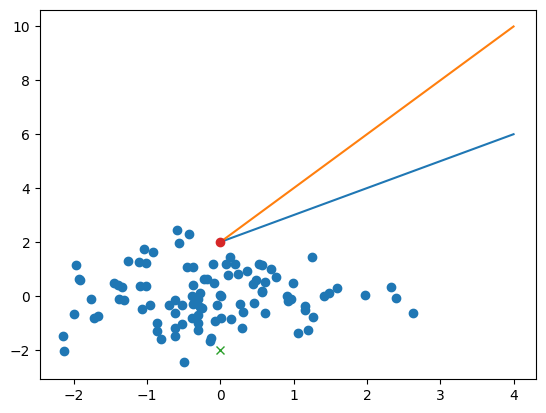

In [83]:
plt.plot(table['X'])
plt.plot(table['Y'])
plt.plot([Bias],marker = 'x')
plt.plot([slope],marker = 'o')
plt.scatter(dataset['X'],dataset['Y'])

In [81]:
y_hat = (slope*7)+Bias

In [82]:
y_hat

12.0

## Error Evaluation in Regression

#### Mean Absolute Error

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [85]:
mean_absolute_error?

Signature:
mean_absolute_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean absolute error regression loss.

Read more in the :ref:`User Guide <mean_absolute_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'}  or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

Returns
-------
loss : float or ndarray 

In [90]:
mean_absolute_error([12],[10])

2.0

In [91]:
mean_squared_error([12],[10])

4.0